In [3]:
from keras.datasets import mnist 

Using TensorFlow backend.


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [7]:
x_train[8794].shape

(784,)

In [8]:
from keras.utils import np_utils

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [11]:
y_train[8794]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD



## 做正規化

In [13]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [14]:
x_train.max()

1.0

In [15]:
model = Sequential()
model.add(Dense(100,input_dim = 784))#第一個隱藏層 4個神經元
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))#輸出
model.add(Activation('softmax'))
model.compile(loss='mse',optimizer=SGD(lr = 0.05),metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0


In [16]:
model_1 = model.fit(x_train,y_train,batch_size = 10,
                        epochs = 20,
                        verbose =1,
                        validation_data = (x_test,y_test))

#verbose 要不要把訓練結果跑出來 有 0 1 2

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0893 - acc: 0.2166 - val_loss: 0.0884 - val_acc: 0.2410
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0871 - acc: 0.2651 - val_loss: 0.0853 - val_acc: 0.2710
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0818 - acc: 0.2929 - val_loss: 0.0770 - val_acc: 0.3651
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0721 - acc: 0.4381 - val_loss: 0.0664 - val_acc: 0.4927
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0608 - acc: 0.5339 - val_loss: 0.0548 - val_acc: 0.5926
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0502 - acc: 0.6579 - val_loss: 0.0449 - val_acc: 0.7227
Epoch 7/20
60000/60000 [==============================] - 5s 81us/step - loss: 0

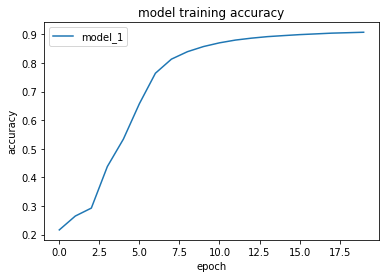

In [17]:
plt.plot(model_1.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_1'],loc = 'best')
plt.show()

In [18]:
from ipywidgets import interact_manual
predict = model.predict_classes(x_test)
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    #因為要畫出來 所以用.reshape(28,28)
    print('神經網路判斷為:',predict[測試編號])
interact_manual(test,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [19]:
model_2 = Sequential()
model_2.add(Dense(100,input_dim = 784))#第一個隱藏層 4個神經元
model_2.add(Activation('sigmoid'))
model_2.add(Dense(80))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))#輸出
model_2.add(Activation('softmax'))
model_2.compile(loss='mse',optimizer=SGD(lr = 0.05),metrics=['accuracy'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 80)                8080      
_________________________________________________________________
activation_5 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                810       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_2_out = model_2.fit(x_train,y_train,batch_size = 10,
                        epochs = 20,
                        verbose =1,
                        validation_data = (x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0895 - acc: 0.1619 - val_loss: 0.0886 - val_acc: 0.2173
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0876 - acc: 0.2477 - val_loss: 0.0861 - val_acc: 0.2944
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0833 - acc: 0.2890 - val_loss: 0.0791 - val_acc: 0.3065
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0746 - acc: 0.3696 - val_loss: 0.0692 - val_acc: 0.4081
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0642 - acc: 0.5088 - val_loss: 0.0584 - val_acc: 0.5814
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0534 - acc: 0.6534 - val_loss: 0.0477 - val_acc: 0.7088
Epoch 7/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0433 - acc: 0.7549 - val_loss: 0.0381 - val_acc

In [21]:
predict = model_2.predict_classes(x_test)
interact_manual(test,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

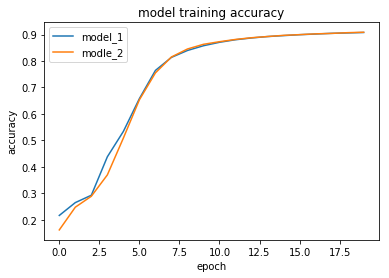

In [22]:
plt.plot(model_1.history['acc'])
plt.plot(model_2_out.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_1','modle_2'],loc = 'best')
plt.show()

## 上圖看起來，model_2與model_1相比起來，只是將第二層隱藏層從50個神經元到80個神經元，看起來沒有大幅度的改變
##     
##    






In [23]:
model_3 = Sequential()
model_3.add(Dense(500,input_dim = 784))#第一個隱藏層 4個神經元
model_3.add(Activation('sigmoid'))
model_3.add(Dense(100))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(10))#輸出
model_3.add(Activation('softmax'))
model_3.compile(loss='mse',optimizer=SGD(lr = 0.05),metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_7 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               50100     
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_3_out = model_3.fit(x_train,y_train,batch_size = 10,
                        epochs = 20,
                        verbose =1,
                        validation_data = (x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.0891 - acc: 0.2022 - val_loss: 0.0877 - val_acc: 0.2773
Epoch 2/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.0855 - acc: 0.2955 - val_loss: 0.0819 - val_acc: 0.3388
Epoch 3/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0756 - acc: 0.4294 - val_loss: 0.0682 - val_acc: 0.5713
Epoch 4/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.0609 - acc: 0.6051 - val_loss: 0.0524 - val_acc: 0.6749
Epoch 5/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0458 - acc: 0.7374 - val_loss: 0.0387 - val_acc: 0.8058
Epoch 6/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.0346 - acc: 0.8230 - val_loss: 0.0299 - val_acc: 0.8474
Epoch 7/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.0277 - acc: 0.8557 - val_loss: 0.

In [25]:
predict = model_3.predict_classes(x_test)
interact_manual(test,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

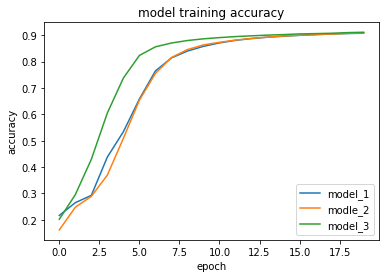

In [26]:
plt.plot(model_1.history['acc'])
plt.plot(model_2_out.history['acc'])
plt.plot(model_3_out.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_1','modle_2','model_3'],loc = 'best')
plt.show()

## 由上面看來 model_3神經元數量做大幅的改變 accuracy會更快到達90%
##     
##    

In [27]:
model_4 = Sequential()
model_4.add(Dense(500,input_dim = 784))#第一個隱藏層 4個神經元
model_4.add(Activation('relu'))
model_4.add(Dense(100))
model_4.add(Activation('relu'))
model_4.add(Dense(10))#輸出
model_4.add(Activation('softmax'))
model_4.compile(loss='mse',optimizer=SGD(lr = 0.05),metrics=['accuracy'])
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_10 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               50100     
_________________________________________________________________
activation_11 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_4_out = model_4.fit(x_train,y_train,batch_size = 10,
                        epochs = 20,
                        verbose =1,
                        validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0324 - acc: 0.7936 - val_loss: 0.0146 - val_acc: 0.9094
Epoch 2/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0133 - acc: 0.9173 - val_loss: 0.0116 - val_acc: 0.9254
Epoch 3/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0109 - acc: 0.9320 - val_loss: 0.0098 - val_acc: 0.9371
Epoch 4/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0094 - acc: 0.9404 - val_loss: 0.0087 - val_acc: 0.9446
Epoch 5/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.0084 - acc: 0.9479 - val_loss: 0.0080 - val_acc: 0.9495
Epoch 6/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.0076 - acc: 0.9533 - val_loss: 0.0073 - val_acc: 0.9536
Epoch 7/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.0069 - acc: 0.9582 - val_loss: 0.

In [29]:
predict = model_4.predict_classes(x_test)
interact_manual(test,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

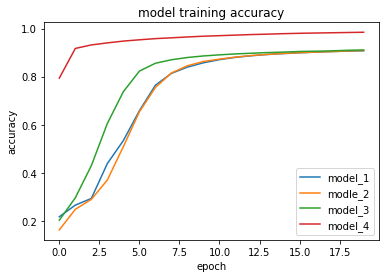

In [30]:
plt.plot(model_1.history['acc'])
plt.plot(model_2_out.history['acc'])
plt.plot(model_3_out.history['acc'])
plt.plot(model_4_out.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_1','modle_2','model_3','model_4'],loc = 'best')
plt.show()

## 由上面看來 將隱藏層Activation 從 sigmoid 改為 'relu'
## accuracy一開始就很高acc: 0.7936  最後更高達0.9848 
##     
##    

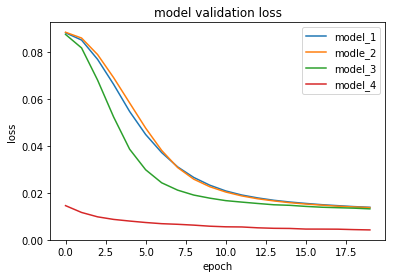

In [31]:
plt.plot(model_1.history['val_loss'])
plt.plot(model_2_out.history['val_loss'])
plt.plot(model_3_out.history['val_loss'])
plt.plot(model_4_out.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_1','modle_2','model_3','model_4'],loc = 'best')
plt.show()

## 由上面看來 
## model_1與model_2 loss 看起來差不多
## model_3 的隱藏層神經元數項較多  loss略為下降
## model_4 將隱藏層Activation 從 sigmoid 改為 'relu' ，loss在一開始就比其他模型還要小很多
##     
##    

In [32]:
score1 = model.evaluate(x_test,y_test)
score2 = model_2.evaluate(x_test,y_test)
score3 = model_3.evaluate(x_test,y_test)
score4 = model_4.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 22us/step


## 印出loss accuracy

In [33]:
print('loss:',score1[0],'正確率:',score1[1])
print('loss:',score2[0],'正確率:',score2[1])
print('loss:',score3[0],'正確率:',score3[1])
print('loss:',score4[0],'正確率:',score4[1])
#loss 是平均誤差
#不過loss很難看的出來好或不好

loss: 0.013850588832423091 正確率: 0.912
loss: 0.013709238089248538 正確率: 0.9146
loss: 0.013174376488197595 正確率: 0.9162
loss: 0.004185449112094284 正確率: 0.9736


## 將最好的model存起來

In [34]:
model_json = model_4.to_json()
open('model_4.json','w').write(model_json)
model_4.save_weights('model_4_weight.h5')